In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_attacking = pd.read_csv(r"C:\Users\PREET\Downloads/attacking.csv", encoding ="latin-1")
df_attempts = pd.read_csv(r"C:\Users\PREET\Downloads/attempts.csv", encoding ="latin-1")
df_distributon = pd.read_csv(r"C:\Users\PREET\Downloads/distributon.csv", encoding ="latin-1")
df_defending = pd.read_csv(r"C:\Users\PREET\Downloads/defending.csv", encoding ="latin-1")
df_disciplinary = pd.read_csv(r"C:\Users\PREET\Downloads/disciplinary.csv", encoding ="latin-1")
df_goalkeeping = pd.read_csv(r"C:\Users\PREET\Downloads/goalkeeping.csv", encoding ="latin-1")
df_goals = pd.read_csv(r"C:\Users\PREET\Downloads/goals.csv", encoding ="latin-1")
df_key_stats = pd.read_csv(r"C:\Users\PREET\Downloads/key_stats.csv", encoding ="latin-1")

In [42]:
df_attacking.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,VinÃ­cius JÃºnior,Real Madrid,Forward,6,3,4,83,13
2,2,SanÃ©,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


In [32]:
df_attacking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   serial        176 non-null    int64 
 1   player_name   176 non-null    object
 2   club          176 non-null    object
 3   position      176 non-null    object
 4   assists       176 non-null    int64 
 5   corner_taken  176 non-null    int64 
 6   offsides      176 non-null    int64 
 7   dribbles      176 non-null    int64 
 8   match_played  176 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.5+ KB


In [33]:
df_attacking.isnull().sum()

serial          0
player_name     0
club            0
position        0
assists         0
corner_taken    0
offsides        0
dribbles        0
match_played    0
dtype: int64

In [34]:
print('Number of missing values in all DataFrames:')
print(df_attacking.isna().sum().sum() + 
df_defending.isna().sum().sum() +
df_attempts.isna().sum().sum() +
df_disciplinary.isna().sum().sum() + 
df_distributon.isna().sum().sum() +
df_goalkeeping.isna().sum().sum() + 
df_goals.isna().sum().sum() + 
df_key_stats.isna().sum().sum())

Number of missing values in all DataFrames:
0


In [35]:
print(f'df_attacking columns: {df_attacking.columns}')
print('----------------------------')
print(f'df_defending columns: {df_defending.columns}')
print('----------------------------')
print(f'df_attempts columns: {df_attempts.columns}')
print('----------------------------')
print(f'df_disciplinary columns: {df_disciplinary.columns}')
print('----------------------------')
print(f'df_distributon columns: {df_distributon.columns}')
print('----------------------------')
print(f'df_goalkeeping columns: {df_goalkeeping.columns}')
print('----------------------------')
print(f'df_goals columns: {df_goals.columns}')
print('----------------------------')
print(f'df_key_stats columns: {df_key_stats.columns}')

df_attacking columns: Index(['serial', 'player_name', 'club', 'position', 'assists', 'corner_taken',
       'offsides', 'dribbles', 'match_played'],
      dtype='object')
----------------------------
df_defending columns: Index(['serial', 'player_name', 'club', 'position', 'balls_recoverd',
       'tackles', 't_won', 't_lost', 'clearance_attempted', 'match_played'],
      dtype='object')
----------------------------
df_attempts columns: Index(['serial', 'player_name', 'club', 'position', 'total_attempts',
       'on_target', 'off_target', 'blocked', 'match_played'],
      dtype='object')
----------------------------
df_disciplinary columns: Index(['serial', 'player_name', 'club', 'position', 'fouls_committed',
       'fouls_suffered', 'red', 'yellow', 'minutes_played', 'match_played'],
      dtype='object')
----------------------------
df_distributon columns: Index(['serial', 'player_name', 'club', 'position', 'pass_accuracy',
       'pass_attempted', 'pass_completed', 'cross_accuracy'

In [36]:
print(f'df_attacking size: {df_attacking.shape}')
print('----------------------------')
print(f'df_defending size: {df_defending.shape}')
print('----------------------------')
print(f'df_attempts size: {df_attempts.shape}')
print('----------------------------')
print(f'df_disciplinary size: {df_disciplinary.shape}')
print('----------------------------')
print(f'df_distributon size: {df_distributon.shape}')
print('----------------------------')
print(f'df_goalkeeping size: {df_goalkeeping.shape}')
print('----------------------------')
print(f'df_goals size: {df_goals.shape}')
print('----------------------------')
print(f'df_key_stats size: {df_key_stats.shape}')

df_attacking size: (176, 9)
----------------------------
df_defending size: (627, 10)
----------------------------
df_attempts size: (546, 9)
----------------------------
df_disciplinary size: (584, 10)
----------------------------
df_distributon size: (608, 12)
----------------------------
df_goalkeeping size: (53, 10)
----------------------------
df_goals size: (183, 13)
----------------------------
df_key_stats size: (747, 8)


In [37]:
g_right_foot = df_goals.sum()['right_foot']
g_left_foot = df_goals.sum()['left_foot']
g_headers = df_goals.sum()['headers']
g_others = df_goals.sum()['others']

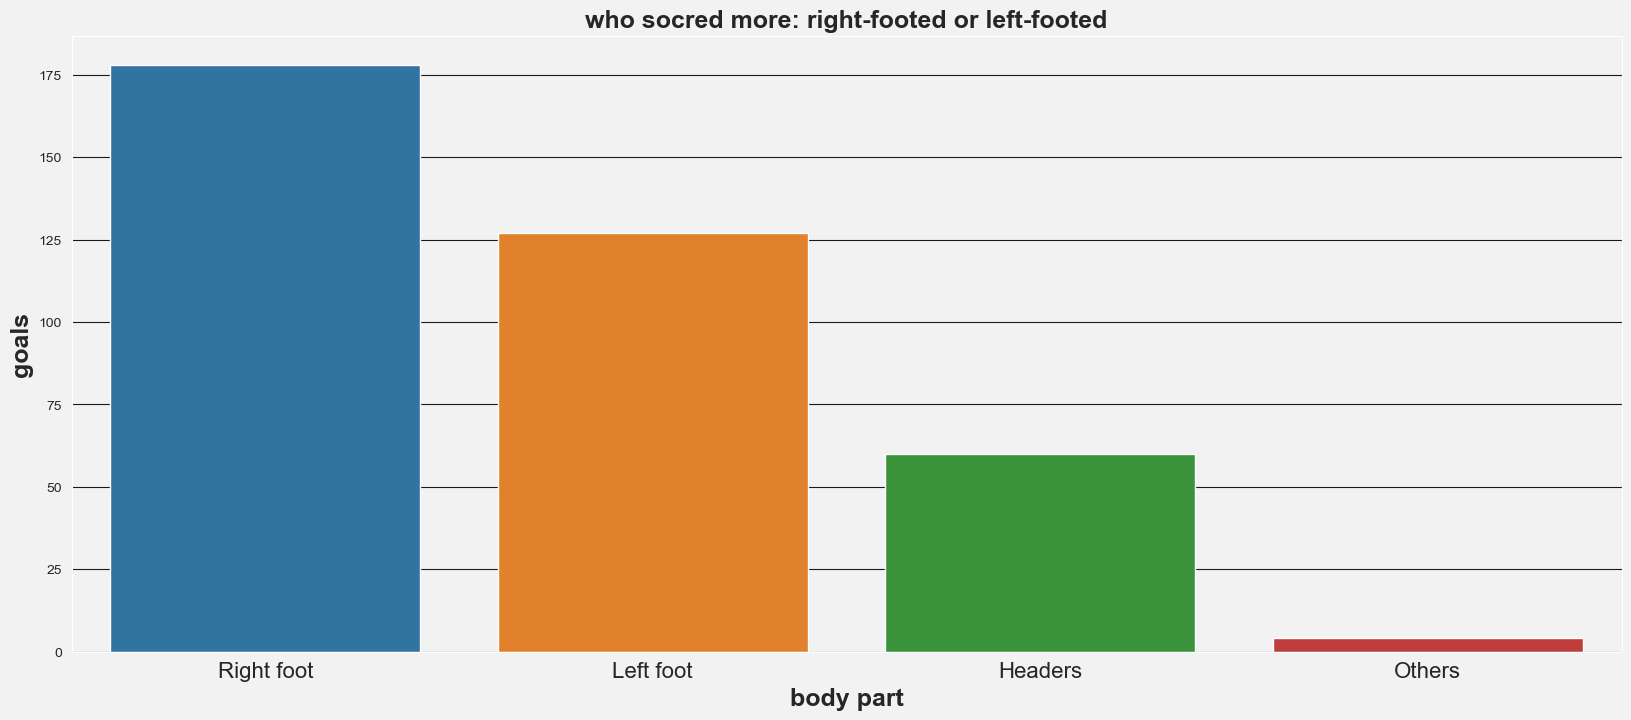

In [43]:
plt.figure(figsize=(20,8))
sns.set_style("darkgrid",{"axes.facecolor": "0.95","grid.color":"0.1","figure.facecolor":"0.95"})
plt.title("who socred more: right-footed or left-footed", fontsize = 18, fontweight ="bold")
plt.xlabel("body part", fontsize=18,fontweight = "bold")
plt.ylabel("goals",fontsize = 18,fontweight = "bold")
plt.xticks(fontsize=16)
plt.yticks(fontweight = 16)
sns.barplot(x=['Right foot', 'Left foot', 'Headers', 'Others'], y=[df_goals['right_foot'].sum(),
                                                                   df_goals['left_foot'].sum(),
                                                                   df_goals['headers'].sum(),
                                                                   df_goals['others'].sum()])
plt.show()

C:\Users\PREET\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


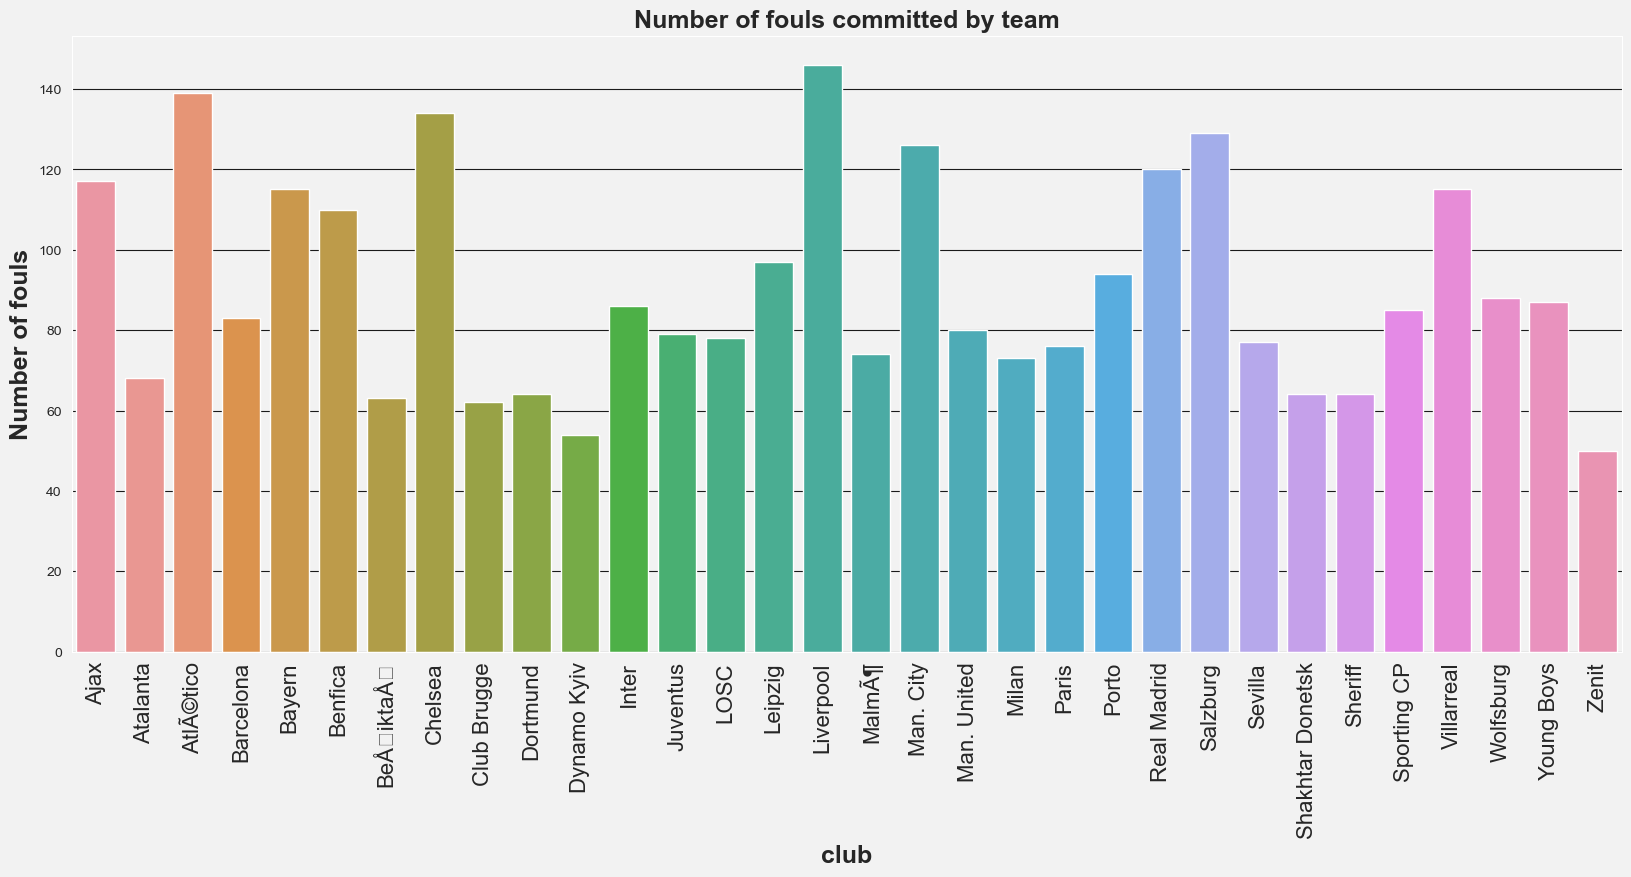

In [39]:
plt.figure(figsize=(20,8))
sns.set_style("darkgrid",{"axes.facecolor": "0.95","grid.color":"0.1","figure.facecolor":"0.95"})
plt.title("Number of fouls committed by team", fontsize = 18, fontweight ="bold")
plt.xlabel("club", fontsize=18,fontweight = "bold")
plt.ylabel("Number of fouls",fontsize = 18,fontweight = "bold")
plt.xticks(fontsize=16)
plt.yticks(fontweight = 16)
plt.xticks(fontsize = 16 , rotation = 90)
sns.barplot(x=df_disciplinary.groupby('club').sum()['fouls_committed'].index,
            y=df_disciplinary.groupby('club').sum()['fouls_committed'].values)   
plt.show()

C:\Users\PREET\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


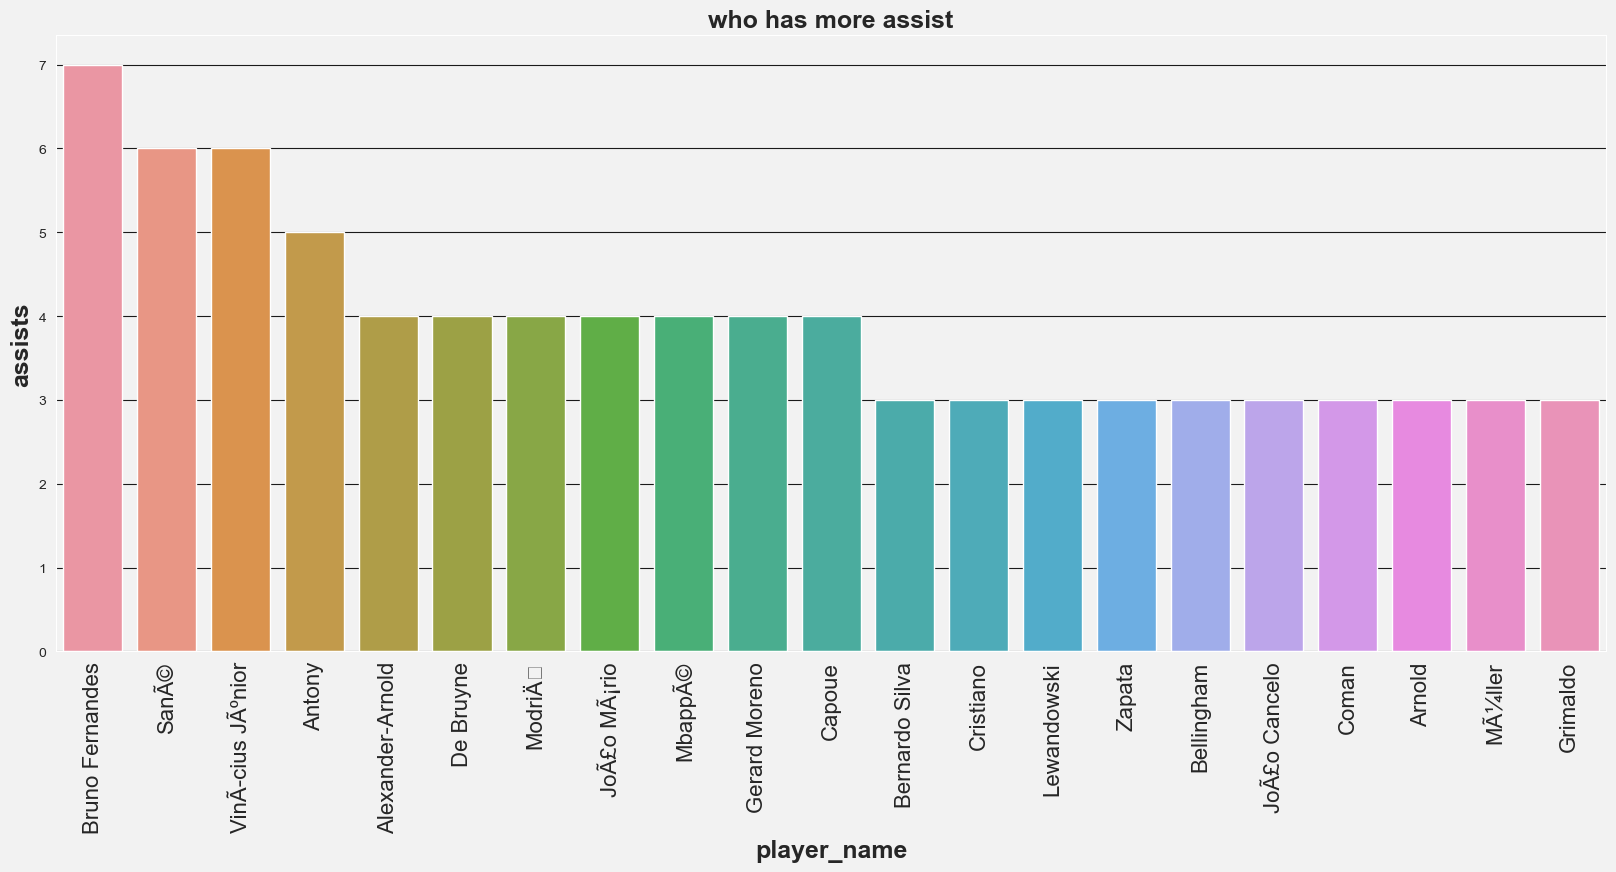

In [40]:
plt.figure(figsize=(20,8))
sns.set_style("darkgrid",{"axes.facecolor": "0.95","grid.color":"0.1","figure.facecolor":"0.95"})
plt.title("who has more assist", fontsize = 18, fontweight ="bold")
plt.xlabel("player_name", fontsize=18,fontweight = "bold")
plt.ylabel("number of assist",fontsize = 18,fontweight = "bold")
plt.xticks(fontsize=16)
plt.yticks(fontweight = 16)
plt.xticks(fontsize = 16 , rotation = 90)
sns.barplot(x=df_attacking.sort_values('assists', ascending= False)[0:21]['player_name'],
            y=df_attacking.sort_values('assists',ascending=False)[0:21]['assists'])   
plt.show()